In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Join ACS info to cbg shapefile by fips

In [2]:
# - Load census block groups
cbgs = gpd.read_file('/opt/laurelhurst4all/data/shapefiles/Census_Tracts_2010/Census_Tracts_2010.shp')
cbgs = cbgs[['GEOID10','geometry']]
cbgs.rename(columns={'GEOID10':'fips'}, inplace=True)
cbgs['fips'] = pd.to_numeric(cbgs['fips'])
cbgs['geometry'] = cbgs['geometry'].to_crs(epsg=4326)

In [3]:
cbgs.head()

,fips,geometry
0,53033002500,"POLYGON ((-122.29602 47.69023, -122.29604 47.6..."
1,53033002600,"POLYGON ((-122.30817 47.69031, -122.30793 47.6..."
2,53033005600,"POLYGON ((-122.39300 47.63956, -122.39300 47.6..."
3,53033006800,"POLYGON ((-122.35070 47.63994, -122.35071 47.6..."
4,53033006000,"POLYGON ((-122.34279 47.64320, -122.34267 47.6..."


In [ ]:
# - Load ACS 2016 info
acs = pd.read_csv('/opt/dssg-hot/data/acs/block_group_census_estimates_wide_original_bins_all_WA.csv',
                  usecols=['fips_code', 'households', 'mean_inc', 'med_age', 'med_inc', 'pc_income',
                              'population', 'race_nonhisp_asian', 'race_nonhisp_white', 'trans_carpool',
                              'trans_drivealone', 'trans_transit'])
acs.rename(columns={'fips_code':'fips'}, inplace=True)
cols = acs.columns.drop(['fips','population'])
#acs.dtypes
#acs.head()

In [ ]:
cbgs_acs = cbgs.merge(acs, on='fips')

## Load in shapefiles for drawing maps

### Load in roads shapefile

<AxesSubplot:>

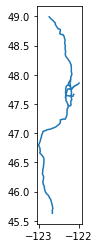

In [10]:
rds500k = gpd.read_file('/opt/laurelhurst4all/data/shapefiles/roads500k/sr500k_20201231.shp')
#print(rds500k.crs)
rds500k['geometry'] = rds500k['geometry'].to_crs(epsg=4326)
#print(rds500k.head())

majrds = rds500k[(rds500k['StateRoute']=='405')|(rds500k['StateRoute']=='005')
                |(rds500k['StateRoute']=='522')|(rds500k['StateRoute']=='520')
                |(rds500k['StateRoute']=='527')|(rds500k['StateRoute']=='90')]
majrds.plot()

### Load in water shapefiles

<AxesSubplot:>

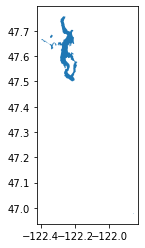

In [14]:
water = gpd.read_file('/opt/laurelhurst4all/data/shapefiles/water/Open_water_for_King_County_and_portions_of_adjacent_counties___wtrbdy_area.shp')
#print(water.crs)
#print(water.head())

majwater = water[(water['NAME']=='Green Lake')|(water['NAME']=='Lake Union')
                 #|(water['NAME']=='Lake Meridian')
                 |(water['NAME']=='Salmon Bay')
                 |(water['NAME']=='Lake Washington')]#|(water['NAME']=='Lake Sammamish')
                 #|(water['NAME']=='Lake Youngs')]
                 #|(water['NAME']=='Lake Stevens')]
                 #|(water['NAME']=='Puget Sound')]
majwater.plot()

### Load in redlining map

In [6]:
rl = gpd.read_file('/opt/laurelhurst4all/data/shapefiles/WASeattle1936/cartodb-query.shp')

In [7]:
print(rl.crs)
print(rl.head())

epsg:4326
   name holc_id holc_grade                                           geometry
0  None      A1          A  POLYGON ((-122.39875 47.69063, -122.39851 47.6...
1  None     A10          A  POLYGON ((-122.39747 47.58351, -122.39673 47.5...
2  None     A11          A  POLYGON ((-122.37809 47.58435, -122.37809 47.5...
3  None     A12          A  POLYGON ((-122.39761 47.55554, -122.39637 47.5...
4  None      A2          A  POLYGON ((-122.25787 47.67193, -122.25612 47.6...


<AxesSubplot:>

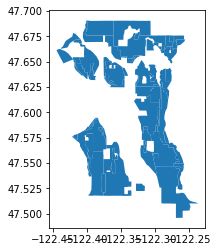

In [8]:
rl.plot()

### Load in zoning map

In [26]:
zoning.columns

Index(['ZONEID', 'ZONING', 'CONTRACT', 'ORDINANCE', 'EFFECTIVE', 'HISTORIC',
       'PEDESTRIAN', 'SHORELINE', 'OVERLAY', 'LIGHTRAIL', 'MHA', 'IZ',
       'MHA_VALUE', 'MIO_NAME', 'CLASS_DESC', 'CATEGORY_D', 'ZONELUT',
       'DETAIL_DES', 'ZONING_DES', 'BASE_ZONE', 'ZONING_PRE', 'CONTRACT_P',
       'ORDINANCE_', 'EFFECTIVE_', 'HISTORIC_P', 'PEDESTRI_1', 'SHORELINE_',
       'OVERLAY_PR', 'LIGHTRAIL_', 'DEVCAP_ZON', 'BASE_ZONE_', 'CATEGORY',
       'CLASS', 'GEO', 'REDEV_FAR', 'RES_MAX_RD', 'RES_BASE_F', 'RES_MAX_FA',
       'COMM_BASE_', 'COMM_MAX_F', 'GEO_FAR', 'NO_MHA_FAR', 'BASE_HEIGH',
       'RES_MAX_HE', 'COMM_MAX_H', 'GEO_HEIGHT', 'RES_OBS_FA', 'COMM_OBS_F',
       'SPLITRES', 'SPLITCOM', 'DU_SQFT', 'EMPL_SQFT', 'STAT_TYPE', 'RATIO',
       'COMMENTS', 'BLR_CATEGO', 'ObjectId', 'geometry'],
      dtype='object')

epsg:4326
   ZONEID           ZONING CONTRACT ORDINANCE   EFFECTIVE HISTORIC PEDESTRIAN  \
0    3837  DMR/C 75/75-170     None    125371  2017-09-01     None       None   
1    4194          SF 7200     None      None  1970-01-01     None       None   
2    4422       LR2 RC (M)     None    125791  2019-04-19     None       None   
3    4423          LR1 (M)     None    125791  2019-04-19     None       None   
4    4424          LR1 (M)     None    125791  2019-04-19     None       None   

  SHORELINE OVERLAY LIGHTRAIL  ... SPLITRES SPLITCOM DU_SQFT EMPL_SQFT  \
0      None      ID      None  ...      0.8      0.2    1000       275   
1      None    None      None  ...      1.0      0.0       0         0   
2      None    None      None  ...      1.0      0.0    1400         0   
3      None    None      None  ...      1.0      0.0    1700         0   
4      None    None      None  ...      1.0      0.0    1700         0   

  STAT_TYPE RATIO                                         

<AxesSubplot:>

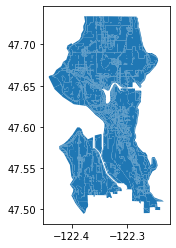

In [9]:
zoning = gpd.read_file('/opt/laurelhurst4all/data/shapefiles/zoning/Land_Use_Zoning_Detail_with_Capacity_Assumptions.shp')
print(zoning.crs)
print(zoning.head())
zoning.plot()

<AxesSubplot:>

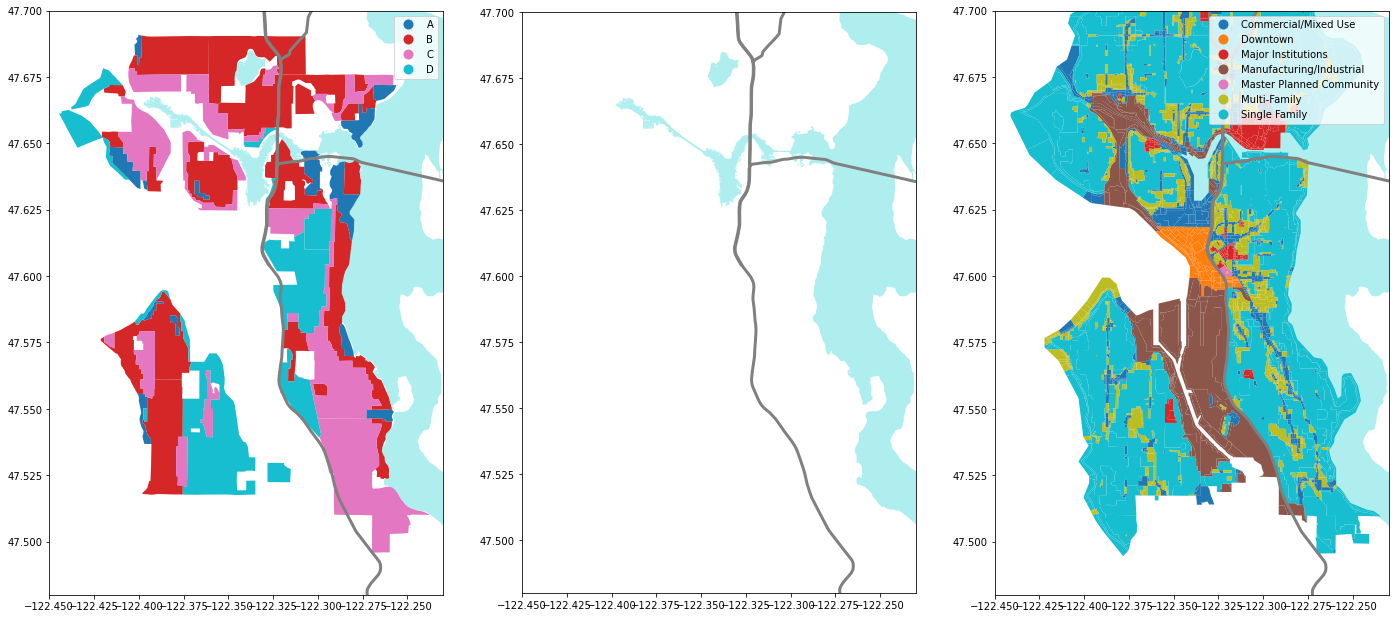

In [27]:
fig,axes = plt.subplots(1, 3, figsize = (24,20))

for ax in axes:
    ax.set_ylim([47.48, 47.7])
    ax.set_xlim([-122.45, -122.23])
    majwater.plot(ax=ax, color='paleturquoise', linewidth=3)
    majrds.plot(ax=ax, color='gray', linewidth=3)

rl.plot(column = 'holc_grade', ax = axes[0], legend=True)
zoning.plot(column = 'CLASS_DESC', ax = axes[2], legend=True)

#fig.savefig('/opt/dssg-hot/notebooks/shirley/figs/' + pdfnamenow + '.pdf', bbox_inches='tight', pad_inches = 0)

In [28]:
import census
import us